In [1]:
from datasources import *
from characterization import *
from analytics import *

# Populating the Complex Networks Data Base

In [2]:
loader_configs = {
    'base_folder': 'data', 
    'random_seed': 123, 
    'loader_mode': 'full'
}
SyntheticNetworks.setup(**loader_configs)
KeggMetabolicNetworks.setup(**loader_configs)

In [3]:
datapool = DataPool()
datapool.persist_fetched = False
datapool.update(n=SyntheticNetworks.classic(samples_per_label=5))
datapool.update(n=KeggMetabolicNetworks.kingdom(samples_per_label=5))


synthetic:classic


[watts-strogatz]              : 100%|█████████████| 5/5 [00:01<00:00,  3.43it/s]



kegg-metabolic:kingdom


[protist]                     : 100%|████████████| 5/5 [00:00<00:00, 553.81it/s]


In [4]:
datapool.networks

,collection,dataset,label,N,M,K,abbr,graph,source
network_id,,,,,,,,,
0,synthetic,classic,barabasi-albert,1000,7964,16.00,"BA(N=1000, K=16)_#84",<containers.GraphAPI object at 0x7fe0e731ea00>,data/synthetic/classic/BA/BA_n=1000_k=16_i=84.txt
1,synthetic,classic,barabasi-albert,2000,9985,10.00,"BA(N=2000, K=10)_#72",<containers.GraphAPI object at 0x7fe0e731e4c0>,data/synthetic/classic/BA/BA_n=2000_k=10_i=72.txt
2,synthetic,classic,barabasi-albert,2000,13972,14.00,"BA(N=2000, K=14)_#24",<containers.GraphAPI object at 0x7fe0e731e940>,data/synthetic/classic/BA/BA_n=2000_k=14_i=24.txt
3,synthetic,classic,barabasi-albert,2000,15964,16.00,"BA(N=2000, K=16)_#25",<containers.GraphAPI object at 0x7fe0e731ec10>,data/synthetic/classic/BA/BA_n=2000_k=16_i=25.txt
4,synthetic,classic,barabasi-albert,500,2979,12.00,"BA(N=500, K=12)_#98",<containers.GraphAPI object at 0x7fe0e731eac0>,data/synthetic/classic/BA/BA_n=500_k=12_i=98.txt
5,synthetic,classic,erdos-renyi,1000,6948,14.00,"ER(N=1000, K=14)_#3",<containers.GraphAPI object at 0x7fe0e731ebb0>,data/synthetic/classic/ER/ER_n=1000_k=14_i=3.txt
6,synthetic,classic,erdos-renyi,1000,7903,16.00,"ER(N=1000, K=16)_#63",<containers.GraphAPI object at 0x7fe0e731e1f0>,data/synthetic/classic/ER/ER_n=1000_k=16_i=63.txt
7,synthetic,classic,erdos-renyi,2000,9976,10.00,"ER(N=2000, K=10)_#83",<containers.GraphAPI object at 0x7fe0e731ed90>,data/synthetic/classic/ER/ER_n=2000_k=10_i=83.txt
8,synthetic,classic,erdos-renyi,2000,8106,8.00,"ER(N=2000, K=8)_#1",<containers.GraphAPI object at 0x7fe0e731e1c0>,data/synthetic/classic/ER/ER_n=2000_k=8_i=1.txt


In [5]:
datapool.update(m=Distances.as_dataframe())
datapool.update(m=Connectivity.as_dataframe())
datapool.update(m=ClusteringAndCycles.as_dataframe())
datapool.update(m=EntropyAndEnergy.as_dataframe())
datapool.update(m=Centrality.as_dataframe())
datapool.update(m=SpectralAnalysis.as_dataframe())
datapool.update(m=Walks.as_dataframe())
datapool.update(m=Automata.as_dataframe())

In [6]:
for automaton in ['tstna', 'llna']:
    # automaton itself
    idx = (datapool.measures['varname']==f'{automaton}_teps').argmax()
    datapool.measures.loc[idx, 'default'].update({'num_steps': 50})
    # network descriptors
    idx = (datapool.measures['varname']==f'{automaton}_hist').argmax()
    datapool.measures.loc[idx, 'default'].update({
        'extractors': ['Es', 'BP_3', 'BP_5'], 
        'resolution': {'Es':[10,20], 'BP_3':8, 'BP_5':32},
        'BP_5': {'digits':5},
        'BP_7': {'digits':7}
    })

In [7]:
cols = [ c for c in datapool.measures.columns if c not in ['varname', 'function'] ]
datapool.measures[cols]

,name,symbol,scope,category,dependence,default
measure_id,,,,,,
0,shortest distances,d_ij,vertex pair,distances,None,None
1,shortest distances distribution,P(d_ij),distrib,distances,[shortest distances],None
2,diameter,D,graph,distances,[shortest distances distribution],None
3,average geodesic distance,l,graph,distances,[shortest distances distribution],None
4,global efficiency,E,graph,distances,[shortest distances distribution],None
5,harmonic mean of the geodesic distances,h,graph,distances,[global efficiency],None
6,spanned tree coverage,s*,vertex,distances,[shortest distances],None
7,vertex degree,k_i,vertex,connectivity,None,None
8,maximum degree,k_max,graph,connectivity,[vertex degree],None


In [8]:
datapool.save('cache/demo', n=True, m=True)

cache/demo/flags.dat saved in disk
cache/demo/networks.dat saved in disk
cache/demo/measures.dat saved in disk


In [11]:
m_mask = (
    ~(datapool.measures['name'].isin(['shortest distances', 'spanned tree coverage'])) & 
    ~(datapool.measures['category'].isin(['spectral analysis', 'walks']))
)
datapool.update(r=datapool.evaluate(measure_subset=m_mask, log_info=True))

Network  40/40: 100%|███████████████████████| 1080/1080 [09:19<00:00,  1.93it/s]


In [12]:
datapool.save('cache/demo', r=True, strict=True)

cache/demo/results.dat saved in disk


# Creating a Tabular Dataset Collection

In [13]:
from analytics import *
from characterization import *

In [14]:
datapool = DataPool()
datapool.load('cache/demo', n=True, m=True, r=True)

cache/demo/flags.dat loaded in memory
cache/demo/networks.dat loaded in memory
cache/demo/measures.dat loaded in memory
cache/demo/results.dat loaded in memory


In [15]:
m_mask = (
    (datapool.measures['category'].isin(['distances','entropy and energy','centrality'])) & 
    (datapool.measures['scope']=='graph')
)
dscoll1 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll1)

Y                                                         \
            collection  dataset            label                      network   
sample                                                                          
0            synthetic  classic  barabasi-albert         BA(N=1000, K=16)_#84   
1            synthetic  classic  barabasi-albert         BA(N=2000, K=10)_#72   
2            synthetic  classic  barabasi-albert         BA(N=2000, K=14)_#24   
3            synthetic  classic  barabasi-albert         BA(N=2000, K=16)_#25   
4            synthetic  classic  barabasi-albert          BA(N=500, K=12)_#98   
5            synthetic  classic      erdos-renyi          ER(N=1000, K=14)_#3   
6            synthetic  classic      erdos-renyi         ER(N=1000, K=16)_#63   
7            synthetic  classic      erdos-renyi         ER(N=2000, K=10)_#83   
8            synthetic  classic      erdos-renyi           ER(N=2000, K=8)_#1   
9            synthetic  classic      erdos-renyi           ER(N=500, K=12)_#7   
10           synthetic  classic       geographic         GEO(N=1000, K=6)_#30   
11           synthetic  classic       geographic         GEO(N=1000, K=8)_#25   
12           synthetic  classic       geographic        GEO(N=2000, K=10)_#44   
13           synthetic  classic       geographic        GEO(N=2000, K=12)_#19   
14           synthetic  classic       geographic         GEO(N=2000, K=8)_#55   
15           synthetic  classic   watts-strogatz  WS(N=1500, K=16, p=0.1)_#47   
16           synthetic  classic   watts-strogatz   WS(N=1500, K=6, p=0.1)_#28   
17           synthetic  classic   watts-strogatz   WS(N=1500, K=8, p=0.1)_#15   
18           synthetic  classic   watts-strogatz  WS(N=2000, K=10, p=0.1)_#46   
19           synthetic  classic   watts-strogatz    WS(N=500, K=6, p=0.1)_#80   
20      kegg-metabolic  kingdom          animals               KingdAnima:bom   
21      kegg-metabolic  kingdom          animals               KingdAnima:cjc   
22      kegg-metabolic  kingdom          animals               KingdAnima:epz   
23      kegg-metabolic  kingdom          animals               KingdAnima:rro   
24      kegg-metabolic  kingdom          animals               KingdAnima:tup   
25      kegg-metabolic  kingdom            fungi               KingdFungi:cdu   
26      kegg-metabolic  kingdom            fungi               KingdFungi:cgr   
27      kegg-metabolic  kingdom            fungi               KingdFungi:erc   
28      kegg-metabolic  kingdom            fungi               KingdFungi:fgr   
29      kegg-metabolic  kingdom            fungi               KingdFungi:slb   
30      kegg-metabolic  kingdom           plants              KingdPlant:ccaj   
31      kegg-metabolic  kingdom           plants               KingdPlant:cic   
32      kegg-metabolic  kingdom           plants               KingdPlant:crb   
33      kegg-metabolic  kingdom           plants              KingdPlant:csat   
34      kegg-metabolic  kingdom           plants               KingdPlant:pxb   
35      kegg-metabolic  kingdom          protist               KingdProti:cho   
36      kegg-metabolic  kingdom          protist               KingdProti:dfa   
37      kegg-metabolic  kingdom          protist               KingdProti:lma   
38      kegg-metabolic  kingdom          protist               KingdProti:pfa   
39      kegg-metabolic  kingdom          protist               KingdProti:tcr   

          X                                                                   \
       diam avg_gdist     effic hmean_gdist p_deg_enrg p_deg_entr q_deg_entr   
sample                                                                         
0         3  2.140232  0.481104    2.078553  42.504204   2.024255   3.358862   
1         4  2.572937  0.406225    2.461692  23.373155   1.823896   3.264628   
2         4  2.280645   0.45514    2.197126  37.790398   1.916774   3.363192   
3         3  2.188572  0.470815    2.123975  45.479014   

In [16]:
m_mask = (datapool.measures['varname'] == 'llna_hist')
dscoll2 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll2)

Y                                                         \
            collection  dataset            label                      network   
sample                                                                          
0            synthetic  classic  barabasi-albert         BA(N=1000, K=16)_#84   
1            synthetic  classic  barabasi-albert         BA(N=2000, K=10)_#72   
2            synthetic  classic  barabasi-albert         BA(N=2000, K=14)_#24   
3            synthetic  classic  barabasi-albert         BA(N=2000, K=16)_#25   
4            synthetic  classic  barabasi-albert          BA(N=500, K=12)_#98   
5            synthetic  classic      erdos-renyi          ER(N=1000, K=14)_#3   
6            synthetic  classic      erdos-renyi         ER(N=1000, K=16)_#63   
7            synthetic  classic      erdos-renyi         ER(N=2000, K=10)_#83   
8            synthetic  classic      erdos-renyi           ER(N=2000, K=8)_#1   
9            synthetic  classic      erdos-renyi           ER(N=500, K=12)_#7   
10           synthetic  classic       geographic         GEO(N=1000, K=6)_#30   
11           synthetic  classic       geographic         GEO(N=1000, K=8)_#25   
12           synthetic  classic       geographic        GEO(N=2000, K=10)_#44   
13           synthetic  classic       geographic        GEO(N=2000, K=12)_#19   
14           synthetic  classic       geographic         GEO(N=2000, K=8)_#55   
15           synthetic  classic   watts-strogatz  WS(N=1500, K=16, p=0.1)_#47   
16           synthetic  classic   watts-strogatz   WS(N=1500, K=6, p=0.1)_#28   
17           synthetic  classic   watts-strogatz   WS(N=1500, K=8, p=0.1)_#15   
18           synthetic  classic   watts-strogatz  WS(N=2000, K=10, p=0.1)_#46   
19           synthetic  classic   watts-strogatz    WS(N=500, K=6, p=0.1)_#80   
20      kegg-metabolic  kingdom          animals               KingdAnima:bom   
21      kegg-metabolic  kingdom          animals               KingdAnima:cjc   
22      kegg-metabolic  kingdom          animals               KingdAnima:epz   
23      kegg-metabolic  kingdom          animals               KingdAnima:rro   
24      kegg-metabolic  kingdom          animals               KingdAnima:tup   
25      kegg-metabolic  kingdom            fungi               KingdFungi:cdu   
26      kegg-metabolic  kingdom            fungi               KingdFungi:cgr   
27      kegg-metabolic  kingdom            fungi               KingdFungi:erc   
28      kegg-metabolic  kingdom            fungi               KingdFungi:fgr   
29      kegg-metabolic  kingdom            fungi               KingdFungi:slb   
30      kegg-metabolic  kingdom           plants              KingdPlant:ccaj   
31      kegg-metabolic  kingdom           plants               KingdPlant:cic   
32      kegg-metabolic  kingdom           plants               KingdPlant:crb   
33      kegg-metabolic  kingdom           plants              KingdPlant:csat   
34      kegg-metabolic  kingdom           plants               KingdPlant:pxb   
35      kegg-metabolic  kingdom          protist               KingdProti:cho   
36      kegg-metabolic  kingdom          protist               KingdProti:dfa   
37      kegg-metabolic  kingdom          protist               KingdProti:lma   
38      kegg-metabolic  kingdom          protist               KingdProti:pfa   
39      kegg-metabolic  kingdom          protist               KingdProti:tcr   

                           X                                              \
       llna_hist:[Es,10]#001 llna_hist:[Es,10]#002 llna_hist:[Es,10]#003   
sample                                                                     
0                   0.014000              0.001000              0.000000   
1                   0.008000              0.000000              0.000500   
2                   0.022000              0.003500              0.004500   
3                   0.013500              0.000500              0.001500   
4    

# Optimizing Classifiers

In [17]:
from analytics import ModelSelector

import itertools as itt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import sklearn as skl

In [22]:
msel = ModelSelector("classification", [
    GaussianNB(),
    *[ KNeighborsClassifier(n_neighbors=2*k+1, weights='distance', n_jobs=4) for k in range(3) ],
    *[ DecisionTreeClassifier(
        criterion=crit, 
        max_depth=2*md+3, 
        min_samples_split=5
    ) for (crit, md) in itt.product(
        ['gini','entropy'],
        list(range(3))
    ) ],
    *[ SVC(kernel=krn, decision_function_shape='ovr') for krn in ['linear', 'rbf', 'sigmoid'] ],
    *[ SVC(kernel='poly', degree=deg+1, decision_function_shape='ovr') for deg in range(2,5) ],
    *[ MLPClassifier(
        hidden_layer_sizes=tuple([128]*n_layer), 
        activation=activ,
        solver='adam',
        learning_rate='adaptive',
        early_stopping=True
    ) for (activ, n_layer) in itt.product(
        ['relu','logistic'], 
        list(range(3))
    ) ]
])

In [23]:
list(enumerate(msel.architectures))

[(0, GaussianNB()),
 (1, KNeighborsClassifier(n_jobs=4, n_neighbors=1, weights='distance')),
 (2, KNeighborsClassifier(n_jobs=4, n_neighbors=3, weights='distance')),
 (3, KNeighborsClassifier(n_jobs=4, weights='distance')),
 (4, DecisionTreeClassifier(max_depth=3, min_samples_split=5)),
 (5, DecisionTreeClassifier(max_depth=5, min_samples_split=5)),
 (6, DecisionTreeClassifier(max_depth=7, min_samples_split=5)),
 (7,
  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)),
 (8,
  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
 (9,
  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)),
 (10, SVC(kernel='linear')),
 (11, SVC()),
 (12, SVC(kernel='sigmoid')),
 (13, SVC(kernel='poly')),
 (14, SVC(degree=4, kernel='poly')),
 (15, SVC(degree=5, kernel='poly')),
 (16,
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(),
                learning_rate='adaptive')),
 (17,
  MLPClassifier(early_stopping=Tr

In [24]:
def unpack_data(dscoll, dsname):
    mask = (dscoll['Y','dataset'] == dsname)
    X = dscoll.loc[mask,'X'].values
    y = dscoll.loc[mask,'Y']['label'].values
    return (X, y)

experiments = {
    'structural measures'  : { name: unpack_data(dscoll1, name) for name in dscoll1['Y','dataset'].unique() },
    'automata descriptors' : { name: unpack_data(dscoll2, name) for name in dscoll2['Y','dataset'].unique() }
}

for name in experiments:
    datasets = experiments[name]
    msel.run_experiment(name, datasets, folds=5, reps=3)

100%|█████████████████████████████████████████| 132/132 [00:22<00:00,  5.85it/s]


In [25]:
msel.compare('accuracy', sorting_score=True, top=5)

model info                          \
            experiment              classifier   
1  structural measures                     SVC   
2  structural measures                     SVC   
3  structural measures  DecisionTreeClassifier   
4  structural measures  DecisionTreeClassifier   
5  structural measures    KNeighborsClassifier   

                                                                   accuracy  \
                                              params global score   classic   
1                                    kernel='linear'     0.958333  0.983333   
2                                   kernel='sigmoid'     0.925000  1.000000   
3  criterion='entropy', max_depth=7, min_samples_...     0.883333  0.933333   
4                   max_depth=7, min_samples_split=5     0.883333  0.916667   
5        n_jobs=4, n_neighbors=1, weights='distance'     0.858333  0.950000   

             
    kingdom  
1  0.933333  
2  0.850000  
3  0.833333  
4  0.850000  
5  0.766667

In [26]:
for ds in msel.evaluation['dataset'].unique():
    display(msel.analyze(ds, by=['accuracy', 'balanced accuracy'], top=5, level=1))

dataset           experiment              model name  \
                                                          
1  classic  structural measures                     SVC   
2  classic  structural measures                     SVC   
3  classic  structural measures    KNeighborsClassifier   
4  classic  structural measures                     SVC   
5  classic  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                                   kernel='sigmoid'  1.000000  0.000000   
2                                    kernel='linear'  0.983333  0.064550   
3        n_jobs=4, n_neighbors=1, weights='distance'  0.950000  0.103510   
4                                                     0.950000  0.103510   
5  criterion='entropy', max_depth=7, min_samples_...  0.933333  0.148404   

  balanced accuracy            
               mean       std  
1          1.000000  0.000000  
2          0.983333  0.064550  
3          0.950000  0.103510  
4          0.950000  0.103510  
5          0.933333  0.148404

dataset           experiment              model name  \
                                                          
1  kingdom  structural measures                     SVC   
2  kingdom  structural measures  DecisionTreeClassifier   
3  kingdom  structural measures                     SVC   
4  kingdom  structural measures  DecisionTreeClassifier   
5  kingdom  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                                    kernel='linear'  0.933333  0.148404   
2                   max_depth=7, min_samples_split=5  0.850000  0.184197   
3                                   kernel='sigmoid'  0.850000  0.246403   
4  criterion='entropy', max_depth=7, min_samples_...  0.833333  0.204124   
5                   max_depth=5, min_samples_split=5  0.833333  0.180937   

  balanced accuracy            
               mean       std  
1          0.933333  0.148404  
2          0.850000  0.184197  
3          0.850000  0.246403  
4          0.833333  0.204124  
5          0.833333  0.180937

In [27]:
mask = (
    (msel.evaluation['model name'] == 'DecisionTreeClassifier') &
    (msel.evaluation['dataset'] == 'classic')
)
msel.evaluation[mask].sort_values('accuracy', ascending=False).head(3)

,experiment,dataset,classifier,model name,model params,fold,repetition,fit time (s),prediction time (ms/sample),accuracy,balanced accuracy,precision micro,precision macro,recall micro,recall macro,f1 micro,f1 macro,confusion matrix
160,structural measures,classic,"DecisionTreeClassifier(max_depth=7, min_sample...",DecisionTreeClassifier,"max_depth=7, min_samples_split=5",3,2,0.000751,0.068247,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,..."
775,automata descriptors,classic,"DecisionTreeClassifier(max_depth=5, min_sample...",DecisionTreeClassifier,"max_depth=5, min_samples_split=5",1,2,0.001342,0.040054,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,..."
225,structural measures,classic,"DecisionTreeClassifier(max_depth=5, min_sample...",DecisionTreeClassifier,"max_depth=5, min_samples_split=5",1,3,0.002080,0.104666,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0,..."


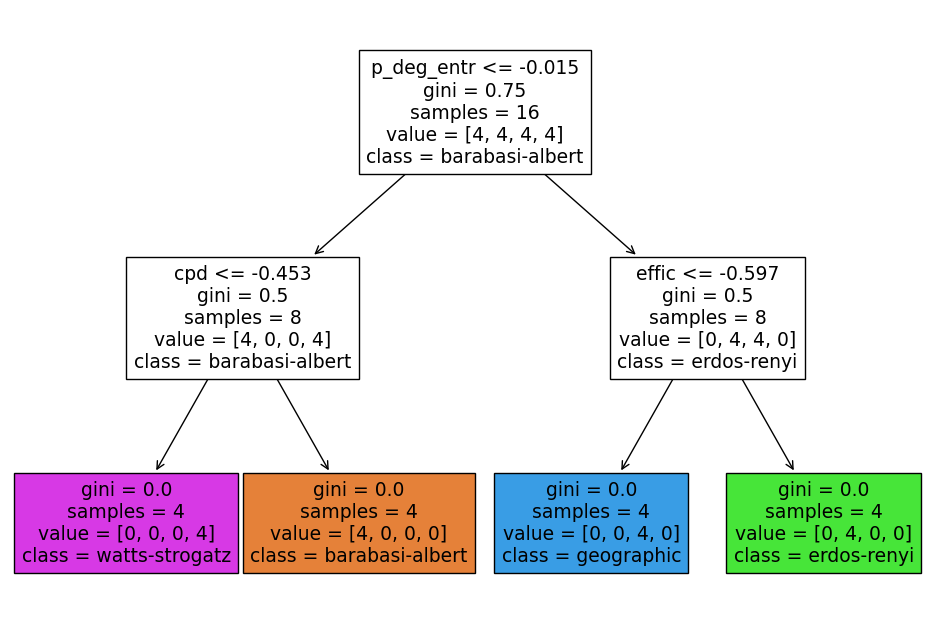

In [28]:
plt.figure(figsize=(12,8))
skl.tree.plot_tree(
    decision_tree=msel.evaluation.loc[225, 'model'], 
    feature_names=dscoll1['X'].columns, 
    class_names=dscoll1[ (dscoll1['Y','dataset'] == 'classic') ]['Y','label'].unique(),
    filled=True
)
plt.show()